## 2.12 Lab: Comparing voting records using dot-product

### Task 2.12.1: 
Write a procedure <i>create_voting_dict(strlist)<\i> that, given a list of
strings (voting records from the source file), returns a dictionary that maps the last name
of a senator to a list of numbers representing that senator’s voting record. You will need to
use the built-in procedure int(·) to convert a string representation of an integer (e.g. ‘1’)
to the actual integer (e.g. 1).

In [1]:
# first, read the voting records
with open("voting_record_dump109.txt") as f:
    mylist = list(f)


In [2]:
def create_voting_dict(strlist):
    d = {}
    for t in strlist:
        l = t.split() 
        d[l[0]] = [int(i) for i in l[3:]]
    return d

### Task 2.12.2: 
Write a procedure <i>policy_compare(sen a, sen b, voting_dict)</i> that,
given two names of senators and a dictionary mapping senator names to lists representing
voting records, returns the dot-product representing the degree of similarity between two
senators’ voting policies.

In [3]:
def policy_compare(sen_a, sen_b, voting_dict):
    """
    Given 2 senators' names and a voting dict, returns the degree of similarity between the two senators'
    voting policies
    """
    assert sen_a in voting_dict
    assert sen_b in voting_dict
    
    return sum([i * j for i, j in zip(voting_dict[sen_a], voting_dict[sen_b])])    

In [4]:
v_dict = create_voting_dict(mylist)

In [5]:
policy_compare("Allen", "Akaka", v_dict)

12

### Task 2.12.3: 
Write a procedure <i>most_similar(sen, voting_dict)</i> that, given the name
of a senator and a dictionary mapping senator names to lists representing voting records,
returns the name of the senator whose political mindset is most like the input senator
(excluding, of course, the input senator him/herself).

In [6]:
def most_similar(sen, voting_dict):
    assert sen in voting_dict
     
    # create a dict to hold the dot-product of senators with sen
    d = {k: policy_compare(sen, k, voting_dict) for k in voting_dict.keys()}
    
    # delete sen
    del d[sen]
    
    # list of tuple of senators with agreement in descending order by value, i.e. voting similarity
    sen_max_list = sorted(d.items(), key=lambda kv: kv[1], reverse=True) 
    
    # return just the name of the senator
    
    return sen_max_list[0][0]

In [7]:
most_similar("Allen", v_dict)

'Bond'

### Task 2.12.4: 
Write a very similar procedure least_similar(sen, voting_dict) that
returns the name of the senator whose voting record agrees the least with the senator whose
name is sen.

In [8]:
def least_similar(sen, voting_dict):
    assert sen in voting_dict
     
    # create a dict to hold dot product of senators with sen
    d = {k: policy_compare(sen, k, voting_dict) for k, _ in voting_dict.items()}
    
    # delete sen
    del d[sen]
    
    # list of tuple of senators with agreement in ascending order by value, i.e. voting similarity
    sen_min_list = sorted(d.items(), key=lambda kv: kv[1]) 
    
    # return both the name of the senator and the similarity score so that this procedure can be used
    # in 2.12.12
    
    return sen_min_list[0]

In [9]:
least_similar("Boxer", v_dict)[0]

'Sununu'

### Task 2.12.5: 
Use these procedures to figure out which senator is most like Rhode Island
legend Lincoln Chafee. Then use these procedures to see who disagrees most with Pennsylvania’s Rick Santorum. Give their names

In [10]:
most_similar("Chafee", v_dict)

'Jeffords'

In [11]:
least_similar("Santorum", v_dict)

('Feingold', 3)

### Task 2.12.6: 
How similar are the voting records of the two senators from your favorite state?

In [12]:
policy_compare("Boxer", "Feinstein",v_dict)

30

### Task 2.12.7: 
Write a procedure <i>find_average_similarity(sen, sen_set, voting_dict)</i>
that, given the name sen of a senator, compares that senator’s voting record to the voting
records of all senators whose names are in sen set, computing a dot-product for each, and
then returns the average dot-product.
Use your procedure to compute which senator has the greatest average similarity with
the set of Democrats (you can extract this set from the input file).

In [13]:
def find_average_similarity(sen, sen_set, voting_dict):
    """
    Computes the average similarity of the voting record of sen with
    senators in sen_set
    
    To make this procedure more general, exclude senator from sen_set if this senator is same as sen
    
    """
    
    return sum([policy_compare(sen, sen_other, voting_dict) for sen_other in sen_set]) / len(sen_set) 
    # /* if sen != sen_other */

In [14]:
# create a helper function to return senators belonging to the Democratic (default) or Republican party
def find_sens_by_party(strlist, party="D"):
    s = set()
    for t in strlist:
        l = t.split() 
        if l[1] == party:
            s.add(l[0])
    return s    

In [15]:
sen_dem = find_sens_by_party(mylist)
sen_rep = find_sens_by_party(mylist, "R")

In [16]:
find_average_similarity("Obama", sen_dem, v_dict)

31.697674418604652

In [17]:
find_average_similarity("Obama", sen_rep, v_dict)

20.618181818181817

Now, find which senator has the greatest voting similarity with the set of the democratic senators.

In [18]:
all_sens = sen_dem.union(sen_rep)

In [19]:
most_similar_to_dems = {sen: find_average_similarity(sen, sen_dem, v_dict) for sen in all_sens}

In [20]:
# view the top 10 senators with most similar voting record to the set of Democratic senators
sorted(most_similar_to_dems.items(), key=lambda kv: kv[1], reverse=True)[:10]

[('Biden', 34.86046511627907),
 ('Sarbanes', 34.674418604651166),
 ('Durbin', 34.674418604651166),
 ('Dodd', 34.13953488372093),
 ('Kennedy', 33.674418604651166),
 ('Reid', 33.604651162790695),
 ('Mikulski', 33.23255813953488),
 ('Dayton', 33.18604651162791),
 ('Reed', 33.0),
 ('Levin', 32.72093023255814)]

Senator Joe Biden, the current Democratic forerunnner for the US 2020 presential election, turns out to have the greatest voting similarity to the set of democratic senators in the file. 

### Task 2.12.8: 
Write a procedure <i>find_average_record(sen_set, voting_dict)</i> that,
given a set of names of senators, finds the average voting record. That is, perform vector
addition on the lists representing their voting records, and then divide the sum by the number
of vectors. The result should be a vector.

Use this procedure to compute the average voting record for the set of Democrats, and
assign the result to the variable average Democrat record. Next find which senator’s
voting record is most similar to the <i>average_Democrat_voting_record</i>. Did you get the same
result as in Task 2.12.7? Can you explain?

In [21]:
def find_average_record(sen_set, voting_dict):
    # create a 46-n 0 vector to hold the average of senatorial votes
    # Rather than hard-coding 46, it is calculated from voting_dict
    avg_voting_vec = [0 for _ in range(len(list(voting_dict.values())[0]))]
    n = len(avg_voting_vec)
    
    for sen in sen_set:
        avg_voting_vec =  [elem1 + elem2 for elem1, elem2 in zip(avg_voting_vec, voting_dict[sen])]
    
    return [elem / n for elem in avg_voting_vec]

In [22]:
average_Democrat_record = find_average_record(sen_dem, v_dict)

Find which senator's record is most similar to the average democratic record.

In [23]:
# create a helper function to compute dot-product of 2 vectors
def dot_product(u, v):
    return sum([u1 * v1 for u1, v1 in zip(u, v)])

In [24]:
most_similar_to_dem_avg = {sen: dot_product(average_Democrat_record, v_dict[sen]) for sen in all_sens}

In [25]:
# display the top 10 most similar to dem avg
sorted(most_similar_to_dem_avg.items(), key=lambda kv: kv[1], reverse=True)[:10]

[('Biden', 32.58695652173913),
 ('Sarbanes', 32.413043478260875),
 ('Durbin', 32.413043478260875),
 ('Dodd', 31.913043478260878),
 ('Kennedy', 31.478260869565226),
 ('Reid', 31.41304347826088),
 ('Mikulski', 31.06521739130436),
 ('Dayton', 31.021739130434785),
 ('Reed', 30.847826086956534),
 ('Levin', 30.58695652173914)]

Senator Biden's record is again most similar to the average Democratic record even though similarity scores in this instance are slightly different. 

The fact that the same faces were again found to be the top 10 senators with the most similar voting record to the average Democratic voting record demonstrates the distributive property of dot-product. The same results were arrived at using different but equilavent calculations thanks to the distributive property of dot-product.

### Task 2.12.9: 
Write a procedure <i>bitter_rivals(voting_dict)</i> to find which two senators disagree the most.

In [26]:
def bitter_rivals(voting_dict):
    d = {}
    for sen in all_sens:
        least_sim = least_similar(sen, voting_dict)
        d[sen+" <-> "+least_sim[0]] = least_sim[1]
    return sorted(d.items(), key=lambda kv: kv[1])

In [27]:
bitter_rivals_set = bitter_rivals(v_dict)

View the top 10 bitterest rivals.

In [28]:
bitter_rivals_set[:10]

[('Feingold <-> Inhofe', -3),
 ('Inhofe <-> Feingold', -3),
 ('Bunning <-> Feingold', -2),
 ('Ensign <-> Feingold', -2),
 ('Sununu <-> Feingold', -1),
 ('Allard <-> Feingold', 0),
 ('Enzi <-> Feingold', 0),
 ('Chambliss <-> Feingold', 0),
 ('Isakson <-> Feingold', 0),
 ('Leahy <-> Sununu', 1)]

<i>Inhofe vs Feingold</i> appears twice above. And Feingold appears 9 out of 10 times in the bitterest rivals honor list!  

In [29]:
freq = [r[0].split("<->")[1].strip() for r in bitter_rivals_set]

## 2.12.7 Open-ended study

 * Is John McCain really a maverick?

In [30]:
# turn freq into a dictionary with frequency count
freq_map = {}
for elem in freq:
    freq_map[elem] = freq_map.get(elem, 0) + 1

Plot the frequency map.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
dfFreqMap = pd.DataFrame(list(freq_map.items()), columns=['senator', 'freq']).sort_values(by="freq", ascending=False)

''

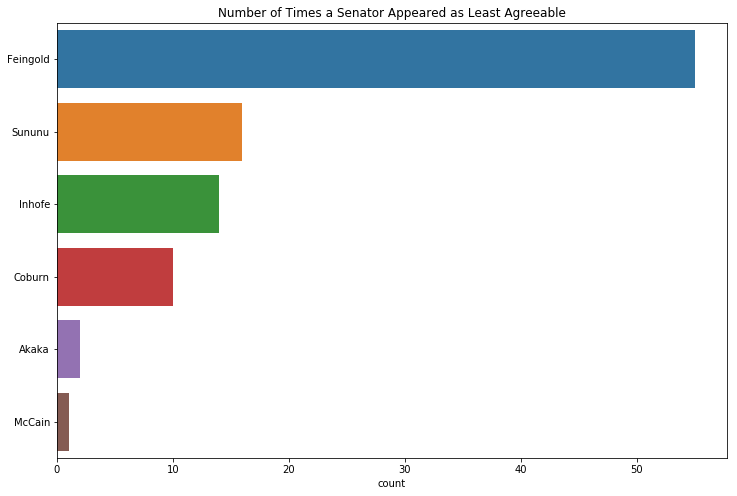

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(y=dfFreqMap.senator, x=dfFreqMap.freq)
plt.ylabel("")
plt.xlabel("count")
plt.title("Number of Times a Senator Appeared as Least Agreeable")
;

The late senator McCain was certainly a maverick but not as much as senators Feingold, Sununu, Inhofe, Coburn and Akaka.